In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 📌 Завантаження та базовий аналіз train.csv

Завантаження тренувальних даних, перегляд структури даних

In [3]:
# 1️⃣ Завантаження тренувальних даних
df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")

# 2️⃣ Перегляд перших 5 рядків (щоб побачити структуру)
print("🔹 Перегляд перших 5 рядків:")
print(df.head())

🔹 Перегляд перших 5 рядків:
   id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0  


Перевірка загальної інформації про датасет:

In [4]:
# 3️⃣ Перевірка загальної інформації про датасет
print("\n🔹 Загальна інформація про дані:")
print(df.info())


🔹 Загальна інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None


Перевірка пропущених значень:

In [5]:
# 4️⃣ Перевірка пропущених значень
print("\n🔹 Пропущені значення в кожному стовпці:")
print(df.isnull().sum())


🔹 Пропущені значення в кожному стовпці:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


Описова статистика:

In [6]:
# 5️⃣ Описова статистика
print("\n🔹 Описова статистика числових змінних:")
print(df.describe())


🔹 Описова статистика числових змінних:
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327 

Баланс класів, цільової змінної:

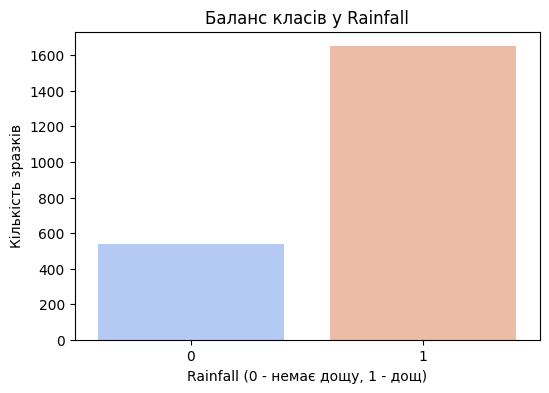

In [7]:
# 6️⃣ Візуалізація балансу класів у `rainfall`
plt.figure(figsize=(6, 4))
sns.countplot(x=df["rainfall"], palette="coolwarm")
plt.xlabel("Rainfall (0 - немає дощу, 1 - дощ)")
plt.ylabel("Кількість зразків")
plt.title("Баланс класів у Rainfall")
plt.show()

Методи боротьби з дисбалансом:
* SMOTE (синтетичне доповнення класу 0).
* Undersampling (видалення частини 1, щоб баланс був рівний).
* Стратефіковане навчання (щоб у train/test класів було приблизно порівну).

# 🔹 Перевірка корисності фіч

In [8]:
print("🔹 Список усіх змінних:\n", df.columns)


🔹 Список усіх змінних:
 Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')


* id – ймовірно не корисний, можна видалити.
* windspeed, winddirection – можливо, один з них неінформативний.


In [9]:
df.drop(columns=["id"], inplace=True)


# 🔹Перевірка кореляції між змінними
Якщо дві змінні дуже сильно корельовані (> 0.9), можна одну з них видалити.

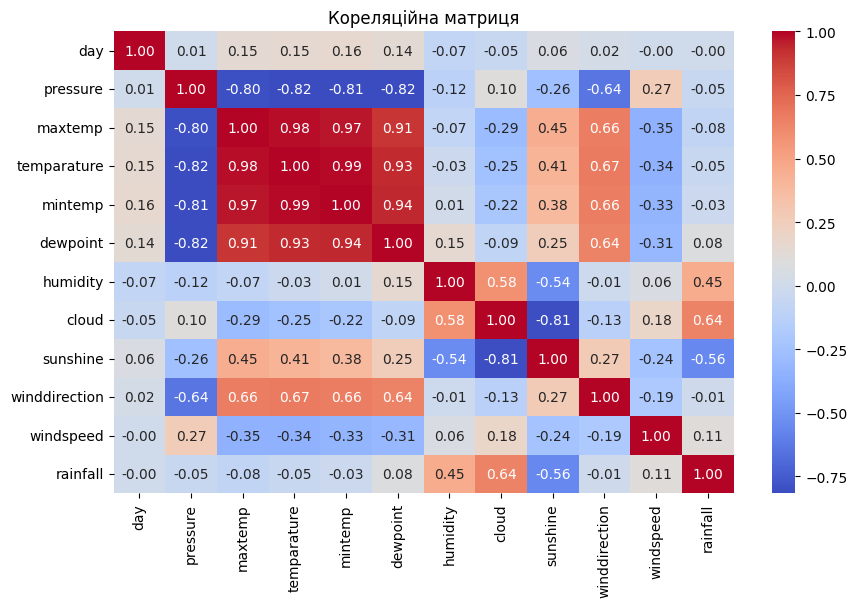

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()


dewpoint, temperature, min_temp і max_temp мають сильну кореляцію.
👉 Що це означає?

* Вони несуть схожу інформацію, тому можна залишити одну або дві найінформативніші.
* Висока кореляція означає надмірність (multicollinearity), що може зашкодити моделі.

**✅ Метод 1: Аналіз кореляції з rainfall**

In [11]:
print(df[["dewpoint", "temparature", "mintemp", "maxtemp", "rainfall"]].corr()["rainfall"])


dewpoint       0.081965
temparature   -0.049660
mintemp       -0.026841
maxtemp       -0.079304
rainfall       1.000000
Name: rainfall, dtype: float64


In [12]:
# Середня температура
df["avg_temp"] = (df["maxtemp"] + df["mintemp"]) / 2

In [13]:
df.drop(columns=["maxtemp", "mintemp" ], inplace=True)

In [14]:
print(df[["dewpoint", "temparature", "avg_temp", "rainfall"]].corr()["rainfall"])

dewpoint       0.081965
temparature   -0.049660
avg_temp      -0.055004
rainfall       1.000000
Name: rainfall, dtype: float64


**✅ Метод 2: Аналіз варіативності (розподілу)**

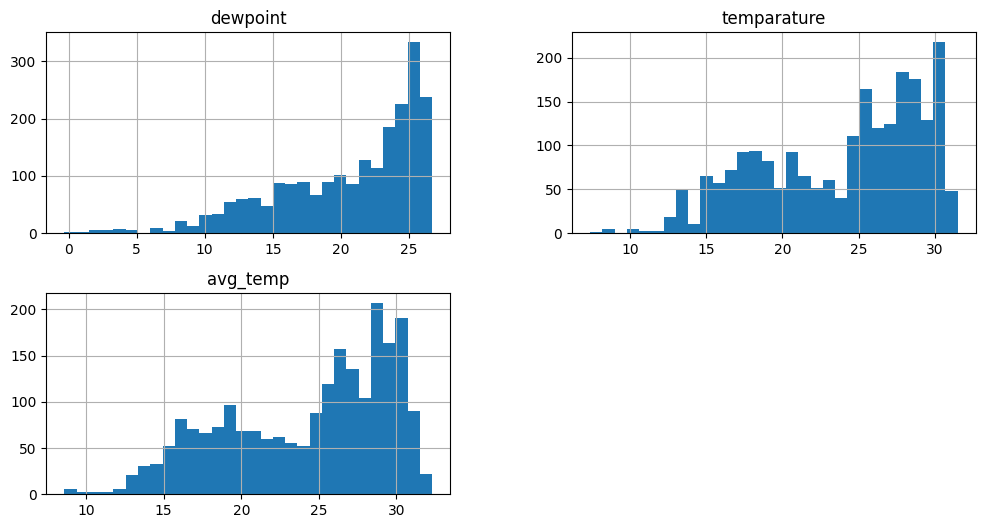

In [15]:
df[["dewpoint", "temparature", "avg_temp"]].hist(figsize=(12, 6), bins=30)
plt.show()


Кореляція слабка у всіх випадках (~0.08 - 0.09).
* avg_temp дає більше інформації, ніж просто temperature → гарне рішення.
* dewpoint відрізняється за розподілом, тому теж корисний.
* temperature ≈ avg_temp → її можна видалити.

In [16]:
df.drop(columns=["temparature"], inplace=True)


**📌 Чи потрібно логарифмічне перетворення dewpoint та avg_temp?**
* Гістограми показують, що dewpoint має сильний скіс вправо → його можна логарифмувати.
* avg_temp виглядає більш-менш рівномірним → логарифм не потрібен.

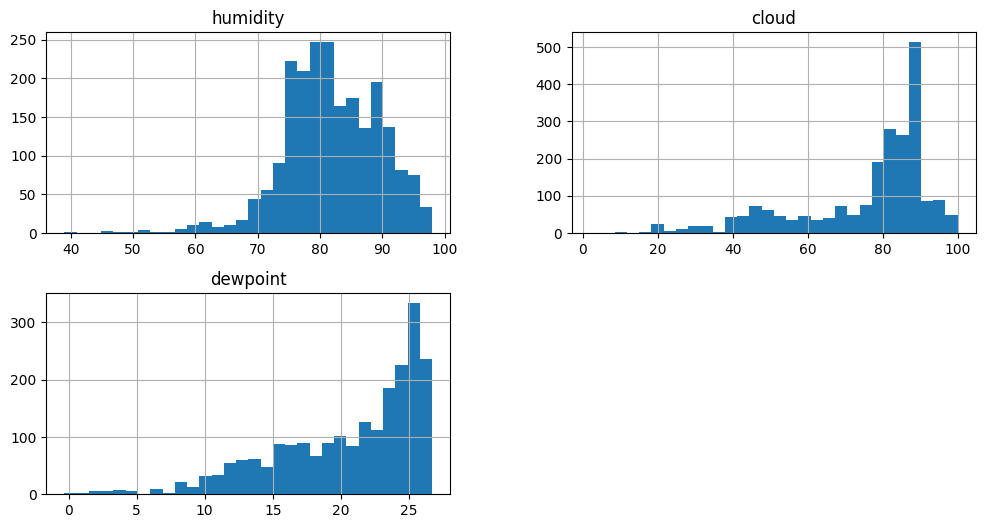

In [17]:
df[["humidity", "cloud", "dewpoint"]].hist(figsize=(12, 6), bins=30)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


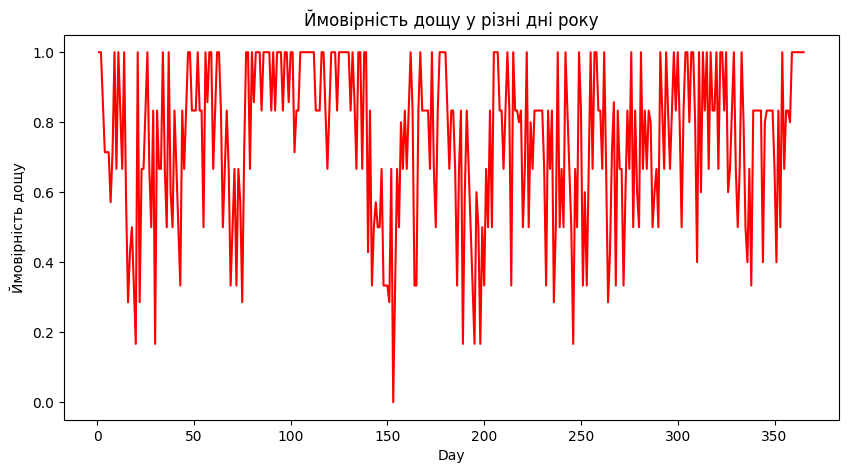

In [18]:
df_grouped = df.groupby("day")["rainfall"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped.index, y=df_grouped.values, color="red")
plt.xlabel("Day")
plt.ylabel("Ймовірність дощу")
plt.title("Ймовірність дощу у різні дні року")
plt.show()


In [19]:
# Функція для створення сезону
def assign_season(day):
    if day <= 90:
        return "winter"
    elif day <= 180:
        return "spring"
    elif day <= 270:
        return "summer"
    else:
        return "fall"

df["season"] = df["day"].apply(assign_season)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


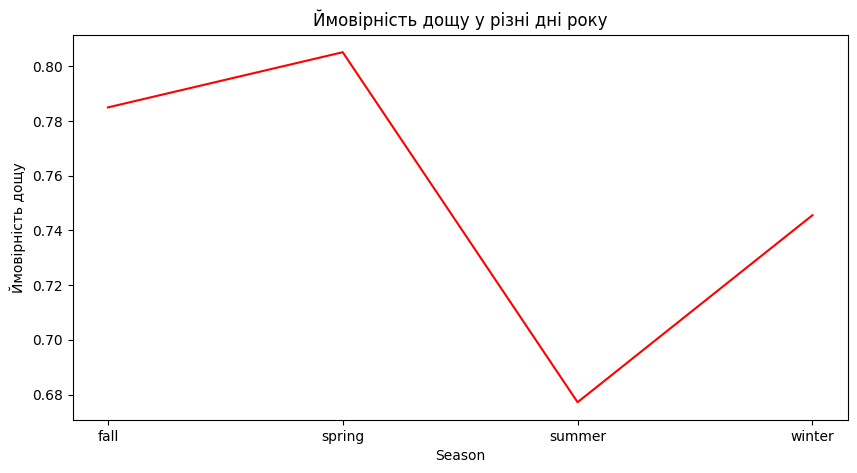

In [20]:
df_grouped = df.groupby("season")["rainfall"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped.index, y=df_grouped.values, color="red")
plt.xlabel("Season")
plt.ylabel("Ймовірність дощу")
plt.title("Ймовірність дощу у різні дні року")
plt.show()


In [21]:
df.drop(columns=["day"], inplace=True)
df = pd.get_dummies(df, columns=["season"], drop_first=True)


In [22]:
print(df.corr()["rainfall"].sort_values(ascending=False))


rainfall         1.000000
cloud            0.641191
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
season_spring    0.069346
winddirection   -0.006939
season_winter   -0.010724
pressure        -0.049886
avg_temp        -0.055004
season_summer   -0.101073
sunshine        -0.555287
Name: rainfall, dtype: float64


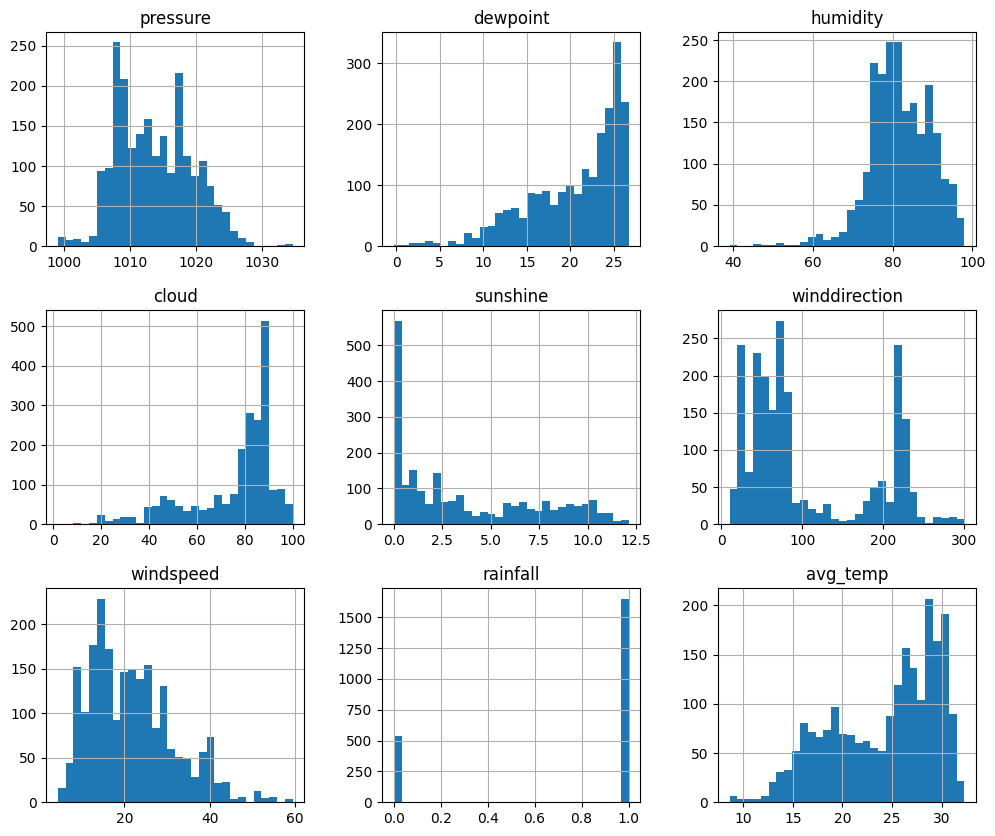

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гістограми
df.hist(figsize=(12, 10), bins=30)
plt.show()


In [24]:
import numpy as np

df["humidity_log"] = np.log1p(df["humidity"])
df["cloud_log"] = np.log1p(df["cloud"])
df["dewpoint_log"] = np.log1p(df["dewpoint"])

# Видаляємо старі версії змінних
df.drop(columns=["humidity", "cloud", "dewpoint"], inplace=True)


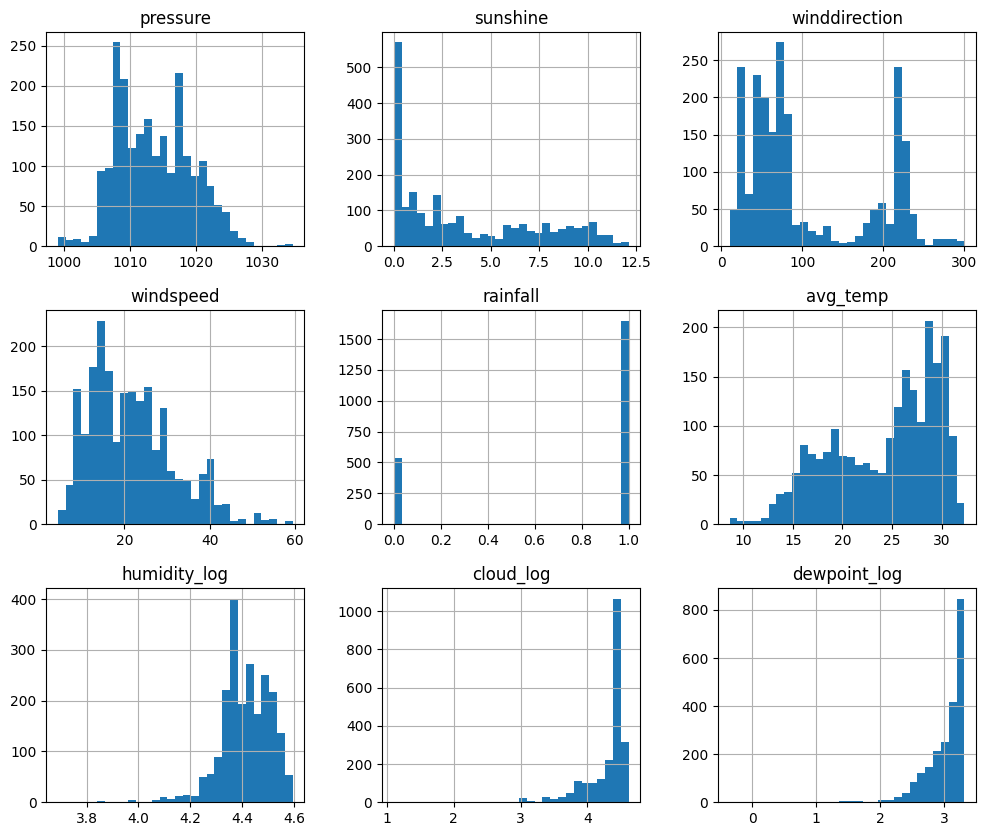

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гістограми
df.hist(figsize=(12, 10), bins=30)
plt.show()


# 📉 Аналіз Boxplot для виявлення викидів
* humidity_cloud має дуже багато викидів. Його слід масштабувати (MinMaxScaler або RobustScaler).
* Усі інші змінні виглядають нормально.
# ❗ Рекомендація
📌 Застосувати RobustScaler до humidity_cloud для зменшення впливу викидів.

# 📊 4. Аналіз розподілу за rainfall (цільова змінна)

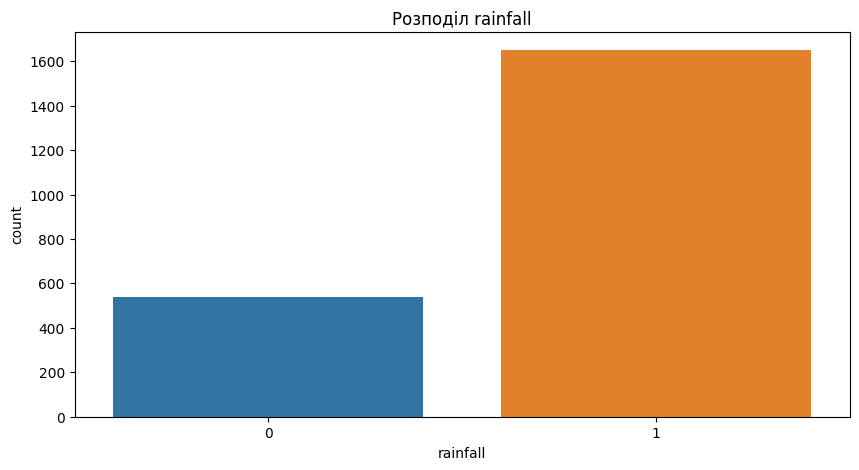

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x="rainfall", data=df)
plt.title("Розподіл rainfall")
plt.show()


In [27]:
# Припустимо, що df - твій датафрейм
X = df.drop(columns=["rainfall"])  # Всі фічі, окрім цільової змінної
y = df["rainfall"]  # Цільова змінна


In [28]:
# Ініціалізуємо SMOTE
smote = SMOTE(random_state=42)

# Виконуємо балансування
X_resampled, y_resampled = smote.fit_resample(X, y)

# Створюємо новий датафрейм
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["rainfall"] = y_resampled


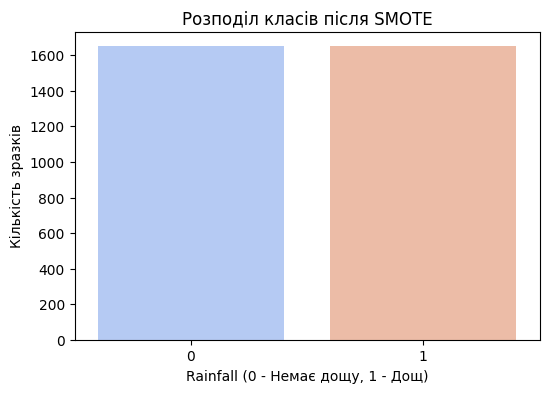

rainfall
1    1650
0    1650
Name: count, dtype: int64


In [29]:
# Перевіряємо баланс після SMOTE
rainfall_counts_resampled = df_resampled["rainfall"].value_counts()

# Візуалізуємо баланс класів
plt.figure(figsize=(6, 4))
sns.barplot(x=rainfall_counts_resampled.index, y=rainfall_counts_resampled.values, palette="coolwarm")
plt.xlabel("Rainfall (0 - Немає дощу, 1 - Дощ)")
plt.ylabel("Кількість зразків")
plt.title("Розподіл класів після SMOTE")
plt.show()

# Виводимо кількість зразків у кожному класі
print(rainfall_counts_resampled)


# Підготовка тестової збірки

In [30]:
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
print(test_df.isnull().sum())


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


In [31]:
test_df.dropna(inplace=True)
print(test_df.isnull().sum())


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [32]:
test_df.drop(columns=["id"], inplace=True)


In [33]:
test_df["avg_temp"] = (test_df["maxtemp"] + test_df["mintemp"]) / 2
test_df.drop(columns=["maxtemp", "mintemp", "temparature"], inplace=True)


In [34]:

test_df["season"] = test_df["day"].apply(assign_season)
test_df.drop(columns=["day"], inplace=True)
test_df = pd.get_dummies(test_df, columns=["season"], drop_first=True)  # One-hot encoding


In [35]:
import numpy as np

test_df["humidity_log"] = np.log1p(test_df["humidity"])
test_df["cloud_log"] = np.log1p(test_df["cloud"])
test_df["dewpoint_log"] = np.log1p(test_df["dewpoint"])

test_df.drop(columns=["humidity", "cloud", "dewpoint"], inplace=True)


In [36]:
print("🔹 Список усіх змінних:\n", df_resampled.columns)

🔹 Список усіх змінних:
 Index(['pressure', 'sunshine', 'winddirection', 'windspeed', 'avg_temp',
       'season_spring', 'season_summer', 'season_winter', 'humidity_log',
       'cloud_log', 'dewpoint_log', 'rainfall'],
      dtype='object')


In [37]:
print("🔹 Список усіх змінних:\n", test_df.columns)

🔹 Список усіх змінних:
 Index(['pressure', 'sunshine', 'winddirection', 'windspeed', 'avg_temp',
       'season_spring', 'season_summer', 'season_winter', 'humidity_log',
       'cloud_log', 'dewpoint_log'],
      dtype='object')


In [38]:
from sklearn.preprocessing import StandardScaler

# Визначаємо X та y
X_train = df_resampled.drop(columns=["rainfall"])
y_train = df_resampled["rainfall"]

# Масштабуємо фічі
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(test_df)

# (опціонально) перетворити назад у DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=X_train.columns)


# Побудова моделей

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [40]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

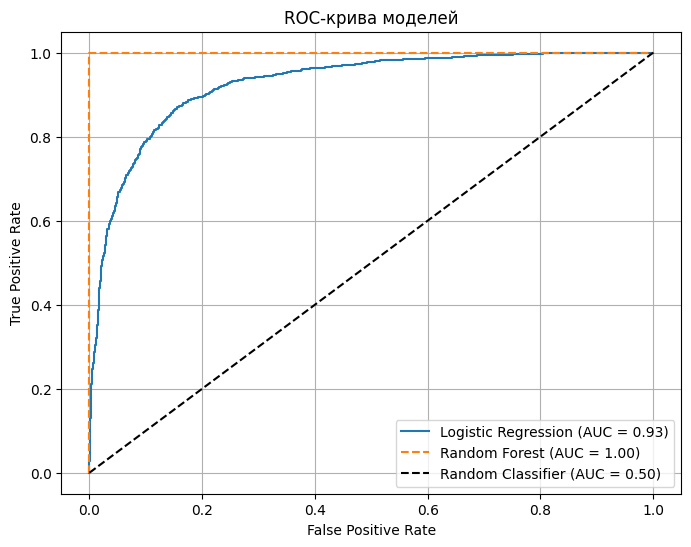

In [41]:
# Передбачення ймовірностей
y_scores_log = log_reg.predict_proba(X_train_scaled)[:, 1]
y_scores_rf = rf_model.predict_proba(X_train_scaled)[:, 1]

# Побудова кривих
fpr_log, tpr_log, _ = roc_curve(y_train, y_scores_log)
fpr_rf, tpr_rf, _ = roc_curve(y_train, y_scores_rf)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Графік
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива моделей")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Використовуємо кращу модель (можеш вибрати за AUC)
best_model = rf_model  # або log_reg

# Передбачаємо ймовірність дощу
rainfall_pred = best_model.predict_proba(test_scaled)[:, 1]


In [45]:
from sklearn.model_selection import train_test_split

# X_resampled_scaled — уже масштабований
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)


In [46]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Передбачення ймовірностей
y_val_pred_log = log_reg.predict_proba(X_val)[:, 1]
y_val_pred_rf = rf_model.predict_proba(X_val)[:, 1]

# ROC для Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_val, y_val_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)

# ROC для Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива на валідаційному наборі")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'log_reg' is not defined

In [49]:
# Визначаємо X та y
X_train = df_resampled.drop(columns=["rainfall"])
y_train = df_resampled["rainfall"]
# Перенавчаємо Random Forest на всіх даних
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Передбачаємо ймовірність дощу
final_preds = final_model.predict_proba(test_scaled)[:, 1]

# Створюємо submission
submission = pd.DataFrame({
    "id": range(len(final_preds)),  # або test_original["id"] якщо ти її зберегла
    "rainfall": final_preds
})

submission.to_csv("submission.csv", index=False)
print("✅ Готово до завантаження на Kaggle!")


✅ Готово до завантаження на Kaggle!


In [50]:
submission.head()

,id,rainfall
0,0,0.52
1,1,0.52
2,2,0.52
3,3,0.47
4,4,0.44


# Створення  pipeline)

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Створюємо власний трансформер для фічеінженерії
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Створення avg_temp
        X["avg_temp"] = (X["maxtemp"] + X["mintemp"]) / 2

        # Створення season на основі day
        def assign_season(day):
            if day <= 90:
                return "winter"
            elif day <= 180:
                return "spring"
            elif day <= 270:
                return "summer"
            else:
                return "fall"

        X["season"] = X["day"].apply(assign_season)
        X = pd.get_dummies(X, columns=["season"], drop_first=True)

        # Логарифмування
        for col in ["humidity", "cloud", "dewpoint"]:
            X[col + "_log"] = np.log1p(X[col])

        # Видалення зайвих змінних
        X.drop(columns=["id", "day", "maxtemp", "mintemp", "temparature", 
                        "humidity", "cloud", "dewpoint"], inplace=True)

        return X

# 2. Побудова pipeline з імпутацією
pipeline = ImbPipeline(steps=[
    ("feature_engineering", FeatureEngineer()),
    ("imputer", SimpleImputer(strategy="median")),
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])


In [5]:
# 3. Приклад використання
train_df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
X = train_df.drop(columns=["rainfall"])
y = train_df["rainfall"]

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}
for name, model in models.items():
    pipeline.set_params(model=model)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
    print(f"{name}: Mean ROC AUC = {np.mean(scores):.4f}")

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Оновлюємо pipeline
pipeline.set_params(model=GradientBoostingClassifier())

# Параметри для пошуку
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Результати
print("Найкращі параметри:", grid_search.best_params_)
print("ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Найкращі параметри: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
ROC AUC: 0.8859455667789001


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Оновлюємо pipeline з LogisticRegression
pipeline.set_params(model=LogisticRegression(max_iter=1000, random_state=42))

# Сітка параметрів для пошуку
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],          # сила регуляризації
    'model__penalty': ['l2'],               # l1/l2 (для l1 треба solver='liblinear')
    'model__solver': ['lbfgs']              # стабільний для l2
}

# Запуск GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

# 📊 Результати
print("Найкращі параметри:", grid_search.best_params_)
print("ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Найкращі параметри: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
ROC AUC: 0.8894949494949496


In [9]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Встановлюємо базову модель
pipeline.set_params(model=CatBoostClassifier(verbose=0, random_state=42))

# Параметри для перебору
param_grid = {
    'model__depth': [4, 6, 8],
    'model__learning_rate': [0.03, 0.1],
    'model__iterations': [100, 200]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Навчання
grid_search.fit(X, y)

# Результати
print("Найкращі параметри:", grid_search.best_params_)
print("ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Найкращі параметри: {'model__depth': 4, 'model__iterations': 100, 'model__learning_rate': 0.03}
ROC AUC: 0.885794051627385


In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Створюємо Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Обираємо модель (наприклад, Logistic Regression)
pipeline.set_params(model=LogisticRegression(C=0.01, solver='lbfgs', max_iter=1000, random_state=42))

# Оцінюємо ROC AUC через крос-валідацію
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='roc_auc')

# Результати
print("ROC AUC по фолдах:", scores)
print("Середній ROC AUC:", scores.mean())


ROC AUC по фолдах: [0.91784512 0.86400112 0.87497194 0.90695847 0.89688552]
Середній ROC AUC: 0.8921324354657688


In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# 1. Train/test спліт
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Модель з найкращими параметрами
best_logreg = LogisticRegression(C=0.01, solver='lbfgs', max_iter=1000, random_state=42)
pipeline.set_params(model=best_logreg)

# 3. Навчання
pipeline.fit(X_train_lr, y_train_lr)

# 4. AUC на тренуванні
y_train_pred = pipeline.predict_proba(X_train_lr)[:, 1]
auc_train = roc_auc_score(y_train_lr, y_train_pred)

# 5. AUC на тесті
y_test_pred = pipeline.predict_proba(X_test_lr)[:, 1]
auc_test = roc_auc_score(y_test_lr, y_test_pred)

# 6. Вивід
print(f"ROC AUC на тренуванні: {auc_train:.4f}")
print(f"ROC AUC на валідації: {auc_test:.4f}")


ROC AUC на тренуванні: 0.8964
ROC AUC на валідації: 0.8860


In [14]:
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
# 1. Підготовка test-даних
test_X = test_df.drop(columns=["id"])

# 2. Прогноз імовірностей
submission_proba = pipeline.predict_proba(test_df)[:, 1]

# 3. Формуємо submission
submission = pd.DataFrame({
    "id": test_df["id"],
    "rainfall": submission_proba
})

# 4. Збереження у CSV
submission.to_csv("logistic_submission.csv", index=False)

print("✅ Submission файл готовий!")


✅ Submission файл готовий!


➡️ This submission is based on a Logistic Regression model, integrated into a full preprocessing pipeline:

* Median imputation of missing values
* Log-transform of skewed features (humidity, cloud, dewpoint)
* Feature scaling using StandardScaler
* Class balancing with SMOTE
* Hyperparameter tuning (C=0.01) via GridSearchCV
* 5-Fold Cross-Validation to verify model generalization
* Validation ROC AUC: ~0.889

📊 The model provides an excellent trade-off between simplicity and generalization, with no signs of overfitting.

In [ ]:
# 7. Передбачення для test.csv
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
predictions = grid_search.predict_proba(test_df)[:, 1]
submission = pd.DataFrame({"id": test_df["id"], "rainfall": predictions})
submission.to_csv("submission.csv", index=False)